# Tabular models

In [1]:
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [3]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [23]:
df.shape
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [5]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [6]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [7]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,Assoc-acdm,Married-AF-spouse,Adm-clerical,Wife,White,False,-0.2629,1.3139,0.7511,<50k
Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,False,0.9831,1.4574,-0.0312,<50k
Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Exec-managerial,Husband,White,False,0.2502,-0.8690,0.3599,<50k
Private,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,False,-0.9959,0.7021,-0.0312,>=50k
Private,Some-college,Married-civ-spouse,Adm-clerical,Wife,Black,False,-0.5561,-0.7904,-0.0312,<50k
Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,False,-0.4828,2.6870,1.5334,>=50k
Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,False,0.6166,0.3692,-0.0312,>=50k
Private,11th,Married-spouse-absent,Machine-op-inspct,Not-in-family,White,False,0.1769,-0.2738,-1.2046,<50k
Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,False,-0.3362,1.8150,-0.4224,<50k
Local-gov,Some-college,Divorced,Other-service,Unmarried,White,False,0.3235,-0.4425,-0.0312,<50k


In [22]:
data.train_ds.cont_names

['age', 'fnlwgt', 'education-num']

In [21]:
test[0]

age                           0.470051
workclass                      Private
fnlwgt                       -0.879302
education                 Some-college
education-num               -0.0312085
marital-status                Divorced
occupation           Handlers-cleaners
relationship                 Unmarried
race                             White
sex                             Female
capital-gain                         0
capital-loss                         0
hours-per-week                      40
native-country           United-States
salary                            <50k
education-num_na                  True
Name: 800, dtype: object

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=42, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)


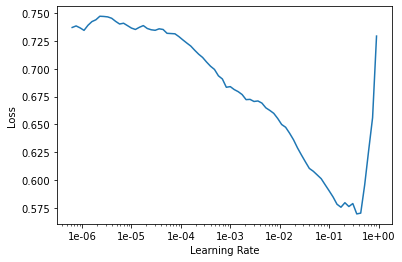

In [24]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.lr_find()
learn.recorder.plot()
print(learn.model)


In [25]:
learn.fit_one_cycle(4, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.379195,0.404131,0.795000,00:03
1,0.359472,0.389882,0.815000,00:03
2,0.348552,0.383430,0.815000,00:03
3,0.351315,0.374721,0.815000,00:03


## Inference

In [34]:
row = df.iloc[0]; row

age                                49
workclass                     Private
fnlwgt                         101320
education                  Assoc-acdm
education-num                      12
marital-status     Married-civ-spouse
occupation                        NaN
relationship                     Wife
race                            White
sex                            Female
capital-gain                        0
capital-loss                     1902
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 0, dtype: object

In [61]:
result = learn.predict(row); result

(Category tensor(1), tensor(1), tensor([0.4016, 0.5984]))

In [48]:
data = learn.data.train_ds[0][0]; data

TabularLine [tensor([5, 8, 3, 0, 6, 5, 1]), tensor([ 0.7632, -0.8381,  0.7511])]

In [42]:
learn.data.classes

['<50k', '>=50k']

In [65]:
result[0].data

tensor(1)

In [44]:
learn.data.valid_ds[0][0]

TabularLine [tensor([ 5, 16,  1,  7,  5,  5,  2]), tensor([ 0.4701, -0.8793, -0.0312])]

In [53]:
preds = learn.get_preds(DatasetType.Test)

TypeError: list indices must be integers or slices, not list